# Importing Required Libraries 

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [83]:
# Loading the Titanic dataset from the 'Titanic_dataset.csv' file using pandas for analysis.

df = pd.read_csv("Titanic_dataset.csv")

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Name      668 non-null    object 
 2   Sex       668 non-null    object 
 3   Age       536 non-null    float64
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Ticket    668 non-null    object 
 7   Fare      668 non-null    float64
 8   Cabin     154 non-null    object 
 9   Embarked  667 non-null    object 
 10  Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 57.5+ KB


## Exploratory Data Analysis (EDA)

In [85]:
# Showing summary statistics

df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,0.407186,32.064552,0.402695
std,0.831638,14.240257,1.080327,0.854695,45.320835,0.490808
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,29.000000,0.000000,0.000000,14.750000,0.000000
75%,3.000000,38.250000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


<Axes: >

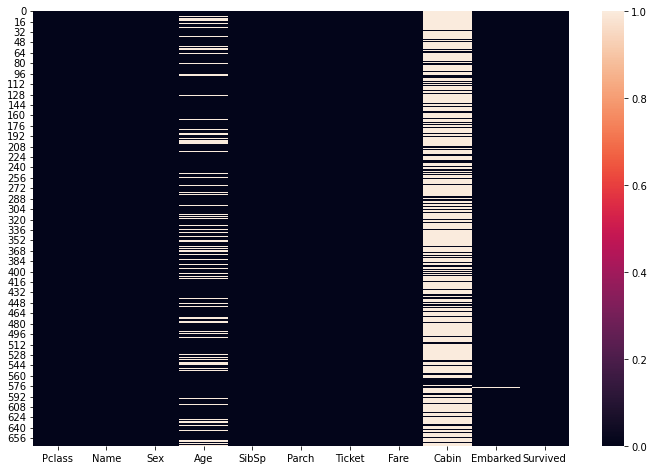

In [86]:
# Missing Data Visualization

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

Describe the columns with missing values and their respective counts, such as "Age" , "Cabin" , and "Embarked".

<Axes: xlabel='Survived', ylabel='count'>

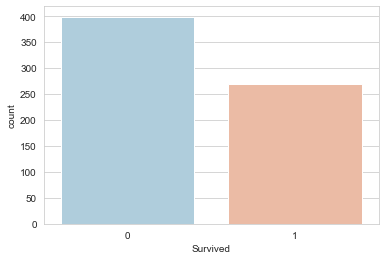

In [111]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

In [87]:
# The count of missing values in the "Age", "Cabin", and "Embarked" columns.

df[["Age", "Cabin", "Embarked"]].isnull().sum()

Age         132
Cabin       514
Embarked      1
dtype: int64

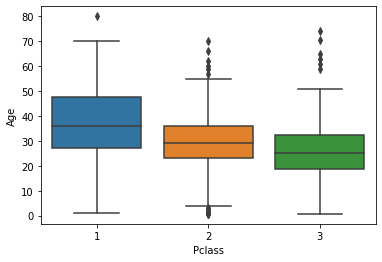

In [88]:
# Age Distribution by Passenger Class
# Here we got kwo the average age of people belong to particular class

sns.boxplot(x="Pclass", y="Age", data=df)
plt.show()

In [89]:
# Here we got the exact avg value of people

df.groupby("Pclass")["Age"].mean().reset_index()

,Pclass,Age
0,1,37.126232
1,2,29.549493
2,3,25.839423


In [90]:
# Crosstab - Pclass vs. Sex
pd.crosstab(df["Pclass"], df["Sex"])

Sex,female,male
Pclass,,
1,72,89
2,60,88
3,109,250


In [91]:
# Crosstab - Pclass vs. Embarked
pd.crosstab(df["Pclass"], df["Embarked"])

Embarked,C,Q,S
Pclass,,,
1,66,1,93
2,13,1,134
3,54,48,257


### Data Preprocessing

In [92]:
# Custom function to impute missing ages based on passenger class, returning average ages for different classes if age is missing.

def ageMean(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 26
        
    else :
        return Age

In [93]:
# Age Imputation

df["Age"] = df[["Age", "Pclass"]].apply(ageMean, axis = 1)

In [94]:
# Removing the "Cabin," "Name," and "Ticket" columns from the dataset to simplify and focus on relevant features.

df.drop(["Cabin", "Name", "Ticket"], axis = 1, inplace=True)

In [95]:
# Encoding Gender and Embarked columns

sex = pd.get_dummies(df["Sex"],drop_first=True, dtype=float)
embark = pd.get_dummies(df["Embarked"], drop_first=True, dtype=float)

In [96]:
# Don't need this columns

df.drop(["Sex", "Embarked"], axis = 1, inplace=True)

In [97]:
# Data Concatenation

df = pd.concat([df, sex, embark], axis = 1)

In [98]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,2,29.0,1,0,26.000,1,0.0,0.0,1.0
1,3,26.0,0,0,8.050,0,1.0,0.0,1.0
2,2,39.0,0,0,26.000,0,1.0,0.0,1.0
3,3,29.0,0,4,21.075,0,0.0,0.0,1.0
4,3,25.0,0,0,7.050,0,1.0,0.0,1.0


In [99]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [100]:
# Splitting the data into training set and testing set

from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [102]:
y_train.shape, y_test.shape

((501,), (167,))

In [103]:
# Scaling is applied to training and testing data separately.

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
sc_train = scaler.fit_transform(X_train)
sc_test = scaler.transform(X_test)

# Logistic Regression Model

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lr = LogisticRegression(C=0.01)

In [106]:
# Model Training

lr.fit(sc_train,y_train)

LogisticRegression(C=0.01)

In [107]:
# Model prediction

y_pred = lr.predict(sc_test)

In [108]:
from sklearn.metrics import *

In [109]:
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)


Confusion Matrix:


array([[98,  4],
       [23, 42]], dtype=int64)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       102
           1       0.91      0.65      0.76        65

    accuracy                           0.84       167
   macro avg       0.86      0.80      0.82       167
weighted avg       0.85      0.84      0.83       167

